In [15]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [56]:
!pip install contextily

import contextily as ctx


Defaulting to user installation because normal site-packages is not writeable


In [16]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install numpy pandas seaborn matplotlib statsmodels scikit-learn yellowbrick shapely 


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from geopandas import GeoDataFrame
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [20]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [22]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/us_tornado_dataset_1950_2021.csv")

data.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [26]:


# Dizionario per mappare i nomi delle colonne a nomi più comprensibili
column_mapping = {
    'yr': 'Year',
    'mo': 'Month',
    'dy': 'Day',
    'date': 'Date',
    'st': 'State',
    'mag': 'Rating',
    'inj': 'Injuries',
    'fat': 'Fatalities',
    'slat': 'Start_Latitude',
    'slon': 'Start_Longitude',
    'elat': 'End_Latitude',
    'elon': 'End_Longitude',
    'len': 'Track_Length',
    'wid': 'Track_Width'
}

# Rinominare le colonne
data = data.rename(columns=column_mapping)

# Verifica delle nuove colonne
print(data.head())


   Year  Month  Day        Date State  Rating  Injuries  Fatalities  \
0  1950      1    3  1950-01-03    IL       3         3           0   
1  1950      1    3  1950-01-03    MO       3         3           0   
2  1950      1    3  1950-01-03    OH       1         1           0   
3  1950      1   13  1950-01-13    AR       3         1           1   
4  1950      1   25  1950-01-25    IL       2         0           0   

   Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Track_Length  \
0           39.10           -89.30         39.12         -89.23           3.6   
1           38.77           -90.22         38.83         -90.03           9.5   
2           40.88           -84.58          0.00           0.00           0.1   
3           34.40           -94.37          0.00           0.00           0.6   
4           41.17           -87.33          0.00           0.00           0.1   

   Track_Width  
0          130  
1          150  
2           10  
3           17  
4

In [27]:
data.columns

Index(['Year', 'Month', 'Day', 'Date', 'State', 'Rating', 'Injuries',
       'Fatalities', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Track_Length', 'Track_Width'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             67558 non-null  int64  
 1   Month            67558 non-null  int64  
 2   Day              67558 non-null  int64  
 3   Date             67558 non-null  object 
 4   State            67558 non-null  object 
 5   Rating           67558 non-null  int64  
 6   Injuries         67558 non-null  int64  
 7   Fatalities       67558 non-null  int64  
 8   Start_Latitude   67558 non-null  float64
 9   Start_Longitude  67558 non-null  float64
 10  End_Latitude     67558 non-null  float64
 11  End_Longitude    67558 non-null  float64
 12  Track_Length     67558 non-null  float64
 13  Track_Width      67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


In [29]:
data.describe()

,Year,Month,Day,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.691273,1.437876,0.090470,37.142412,-92.784618,22.730695,-56.245590,3.478340,106.577030
std,19.330015,2.438192,8.736773,1.283375,18.263956,1.484106,5.093979,8.689103,18.588638,45.489157,8.278775,205.802676
min,1950.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,0.000000,-94.709800,0.100000,20.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,32.480000,-84.420000,0.800000,50.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,38.610000,0.000000,3.130000,100.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,234.700000,4576.000000


In [30]:
data.duplicated().sum()
data.drop_duplicates()

,Year,Month,Day,Date,State,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [31]:
missing_values = data.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

Year               0
Month              0
Day                0
Date               0
State              0
Rating             0
Injuries           0
Fatalities         0
Start_Latitude     0
Start_Longitude    0
End_Latitude       0
End_Longitude      0
Track_Length       0
Track_Width        0
dtype: int64

In [32]:
data.shape

(67558, 14)

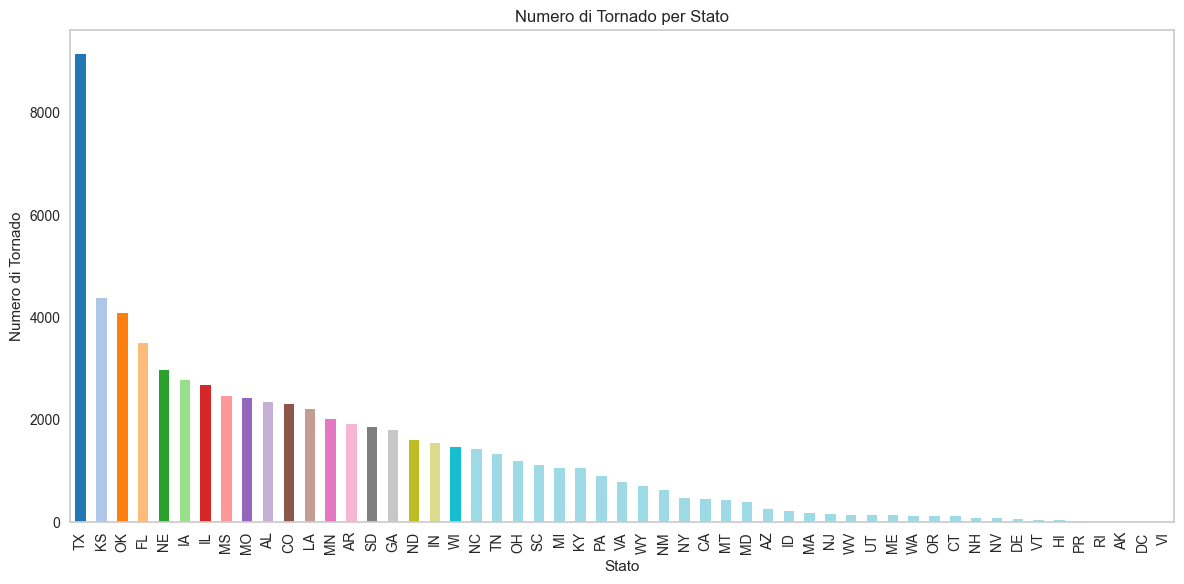

In [36]:
# Conta il numero di tornado per stato
state_tornado = data['State'].value_counts()

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
color_range = range(len(state_tornado))
state_tornado.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Numero di Tornado per Stato')
plt.xlabel('Stato')
plt.ylabel('Numero di Tornado')
plt.grid(False)

# Mostra il grafico a barre
plt.tight_layout()
plt.show()



In [79]:
data["State"].value_counts(dropna=False)

State
TX    9149
KS    4375
OK    4092
FL    3497
NE    2967
IA    2773
IL    2682
MS    2476
MO    2427
AL    2358
CO    2306
LA    2222
MN    2023
AR    1912
SD    1861
GA    1801
ND    1617
IN    1543
WI    1467
NC    1431
TN    1331
OH    1196
SC    1116
MI    1071
KY    1067
PA     902
VA     787
WY     711
NM     634
NY     476
CA     462
MT     431
MD     389
AZ     270
ID     218
MA     178
NJ     170
WV     143
UT     134
ME     134
WA     125
OR     121
CT     120
NH      94
NV      94
DE      69
VT      46
HI      41
PR      28
RI      13
AK       4
DC       3
VI       1
Name: count, dtype: int64

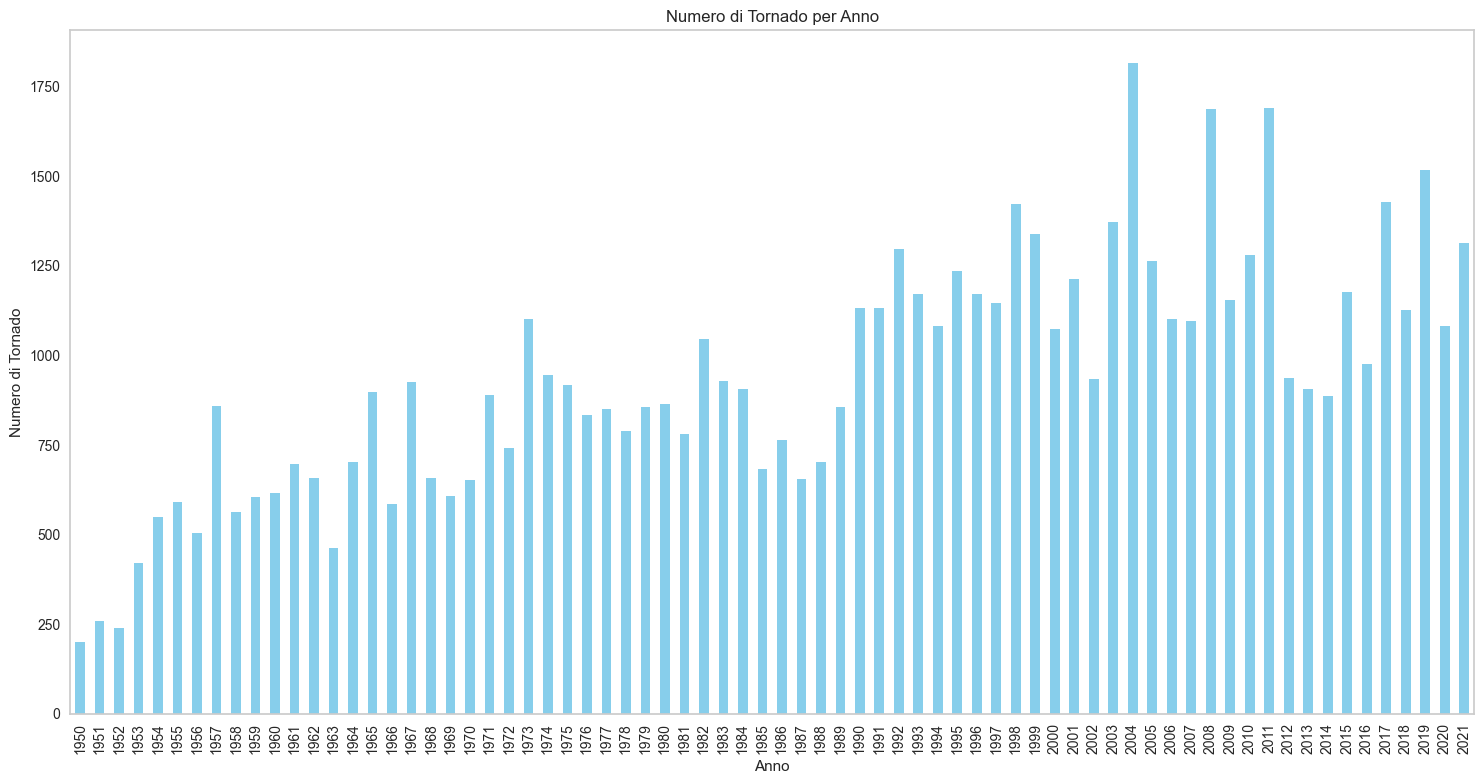

In [39]:

data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

# Numero di Tornado per Anno
tornado_per_year = data['Year'].value_counts().sort_index()

# Grafico a Barre per Anno
plt.figure(figsize=(15, 8))
tornado_per_year.plot(kind='bar', color='skyblue')
plt.title('Numero di Tornado per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Tornado')
plt.grid(False)
plt.tight_layout()
plt.show()


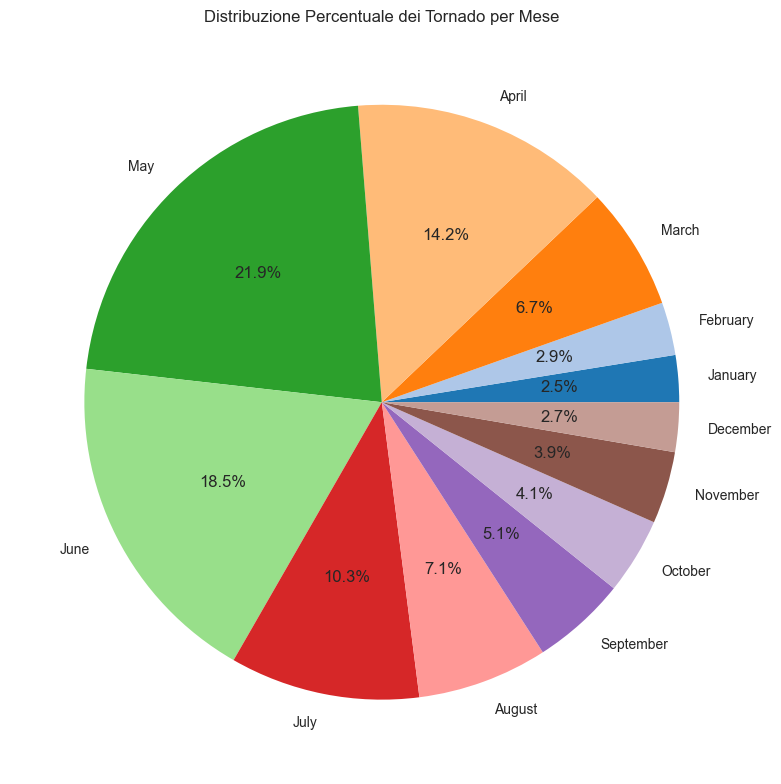

In [50]:
import calendar

# Mappa dei numeri dei mesi ai nomi dei mesi
month_names = {i: calendar.month_name[i] for i in range(1, 13)}


# Grafico a Torta per Mese con Legenda
plt.figure(figsize=(10, 8))
tornado_per_month.plot(kind='pie', autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors, labels=[month_names[i] for i in tornado_per_month.index])
plt.title('Distribuzione Percentuale dei Tornado per Mese')
plt.ylabel('')
plt.tight_layout()
plt.show()


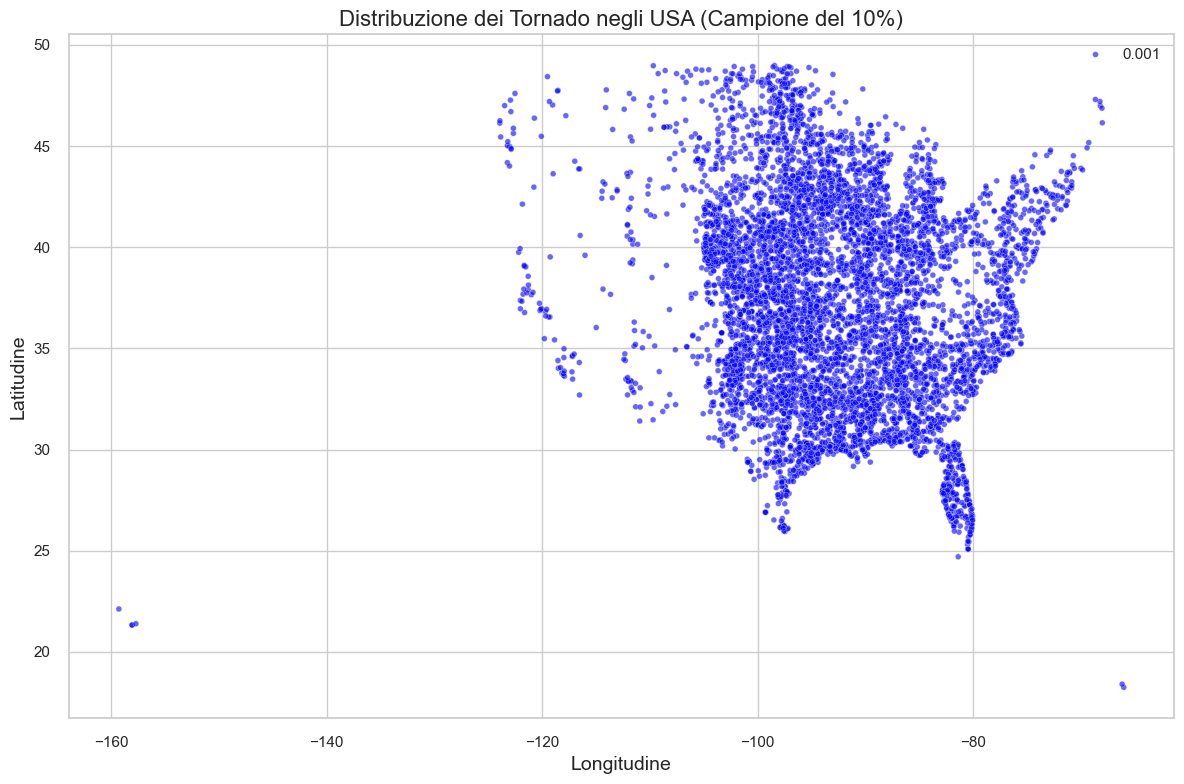

In [75]:
# Estrai un campione del 10% dei dati per velocizzare la visualizzazione
sample_data = data.sample(int(0.1 * len(data)))

# Crea il grafico a dispersione per la distribuzione geografica dei tornado
plt.figure(figsize=(12, 8))
sns.scatterplot(x=sample_data['Start_Longitude'], y=sample_data['Start_Latitude'], size=0.001, color='blue', alpha=0.6)

# Aggiungi dettagli e titoli
plt.title('Distribuzione dei Tornado negli USA (Campione del 10%)', fontsize=16)
plt.xlabel('Longitudine', fontsize=14)
plt.ylabel('Latitudine', fontsize=14)
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()



In [74]:
# Conta i tornado per stato
state_count_tornado = data['State'].value_counts()

# Carica il file GeoJSON degli stati degli USA
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/usa-states.geojson"

# Crea il grafico a mappa
fig = go.Figure(data=go.Choropleth(
    z=state_count_tornado.values.astype(float),  # I dati per ogni stato
    locations=state_count_tornado.index,  # Gli stati
    locationmode='USA-states',  # Usa la modalità degli stati USA
    colorscale='YlOrRd',  # Cambia la palette dei colori se necessario
    colorbar_title="Number of Tornadoes",
))

# Aggiungi il layout
fig.update_layout(
    title_text='Tornado Count by State in the US (1950-2021)',
    geo=dict(
        scope='usa',
        showland=True,
        landcolor='lightgray',
        subunitcolor='white',
    ),
)

# Mostra il grafico
fig.show()

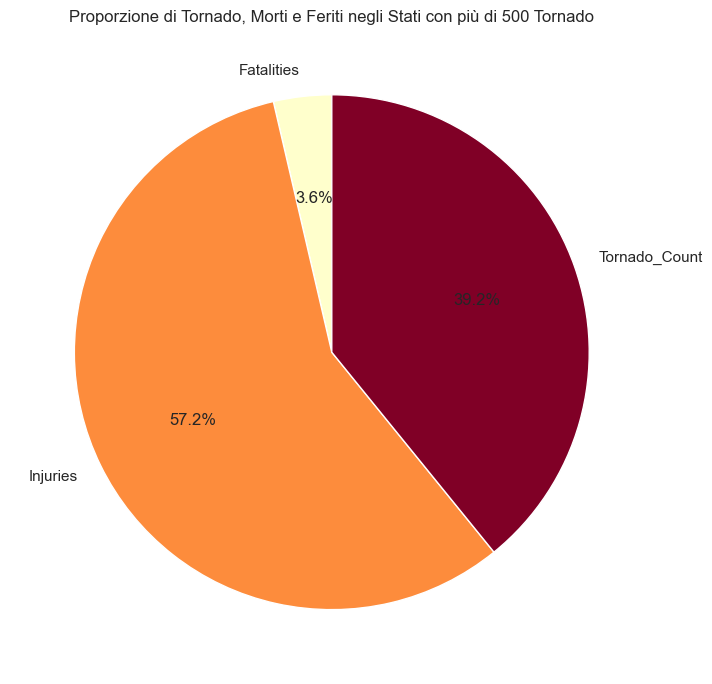

In [96]:
# Pie chart per rappresentare la proporzione tra tornado, morti e feriti
state_summary = state_data_filtered[['State', 'Fatalities', 'Injuries', 'Tornado_Count']].set_index('State').sum()

# Creare un pie chart
plt.figure(figsize=(10, 7))
state_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='YlOrRd')
plt.title('Proporzione di Tornado, Morti e Feriti negli Stati con più di 500 Tornado')
plt.ylabel('')

# Mostra il grafico
plt.tight_layout()
plt.show()


In [105]:
# Calcolare il numero di morti per ogni anno
deaths = data.groupby('Year')['Fatalities'].sum().reset_index()

# Creazione del grafico a barre con plotly.graph_objects e palette di colori
fig = go.Figure()

fig.add_trace(go.Bar(
    x=deaths['Year'],
    y=deaths['Fatalities'],
    marker=dict(
        color=deaths['Fatalities'],  # Usa i valori di 'Fatalities' per colorare le barre
        colorscale='Viridis',  # Cambia la palette dei colori
        colorbar=dict(title='Numero di Morti')  # Etichetta per la barra dei colori
    ),
    hovertemplate='Anno: %{x}<br>Morti: %{y}'  # Mostra anno e numero di morti al passaggio del mouse
))

# Aggiornamento layout per migliorare la leggibilità
fig.update_layout(
    title='Totale Morti per Tornado negli USA per Anno',
    title_x=0.5,
    title_font_size=24,
    xaxis_title='Anno',
    yaxis_title='Morti',
    template='plotly_dark'  # Cambia il template per un look scuro
)

# Mostra il grafico
fig.show()